In [ ]:
!pip install lazypredict

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler
import plotly
import warnings
import sklearn
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, classification_report
from lazypredict.Supervised import LazyClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, auc
import pickle
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
data=pd.read_csv("/content/sample_data/data.csv")
data.head(10)

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.20
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.40
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.80
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.50
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.70
5,0.02,10,40,honeycomb,200,60,40,pla,0,60,24,1.10
6,0.02,5,10,grid,205,65,40,pla,25,55,12,1.30
7,0.02,10,10,honeycomb,210,70,40,pla,50,21,14,1.50
8,0.02,9,70,grid,215,75,40,pla,75,24,27,1.40
9,0.02,8,40,honeycomb,220,80,40,pla,100,30,25,1.70


In [ ]:
data.shape

(50, 12)

In [ ]:
data.describe()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
count,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,0.11,5.22,53.40,221.50,70.00,64.00,50.00,170.58,20.08,1.67
std,0.06,2.92,25.36,14.82,7.14,29.69,35.71,99.03,8.93,0.79
min,0.02,1.00,10.00,200.00,60.00,40.00,0.00,21.00,4.00,0.40
25%,0.06,3.00,40.00,210.00,65.00,40.00,25.00,92.00,12.00,1.10
50%,0.10,5.00,50.00,220.00,70.00,60.00,50.00,165.50,19.00,1.55
75%,0.15,7.00,80.00,230.00,75.00,60.00,75.00,239.25,27.00,2.18
max,0.20,10.00,90.00,250.00,80.00,120.00,100.00,368.00,37.00,3.30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [ ]:
# data.isnull()

In [ ]:
data.isnull().sum()

,0
layer_height,0
wall_thickness,0
infill_density,0
infill_pattern,0
nozzle_temperature,0
bed_temperature,0
print_speed,0
material,0
fan_speed,0
roughness,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.columns

Index(['layer_height', 'wall_thickness', 'infill_density', 'infill_pattern',
       'nozzle_temperature', 'bed_temperature', 'print_speed', 'material',
       'fan_speed', 'roughness', 'tension_strenght', 'elongation'],
      dtype='object')

In [ ]:
categorical=data.drop(['layer_height',	'wall_thickness',	'infill_density',	"nozzle_temperature",	"bed_temperature",	"print_speed","fan_speed",	"roughness",	"tension_strenght",	"elongation"],axis=1)
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   infill_pattern  50 non-null     object
 1   material        50 non-null     object
dtypes: object(2)
memory usage: 928.0+ bytes


In [ ]:
categorical.head(8)

,infill_pattern,material
0,grid,abs
1,honeycomb,abs
2,grid,abs
3,honeycomb,abs
4,grid,abs
5,honeycomb,pla
6,grid,pla
7,honeycomb,pla


In [ ]:
numeric=data.drop(['infill_pattern','material'],axis=1)
numeric.head(8)

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,220,60,40,0,25,18,1.20
1,0.02,7,90,225,65,40,25,32,16,1.40
2,0.02,1,80,230,70,40,50,40,8,0.80
3,0.02,4,70,240,75,40,75,68,10,0.50
4,0.02,6,90,250,80,40,100,92,5,0.70
5,0.02,10,40,200,60,40,0,60,24,1.10
6,0.02,5,10,205,65,40,25,55,12,1.30
7,0.02,10,10,210,70,40,50,21,14,1.50


***EDA***

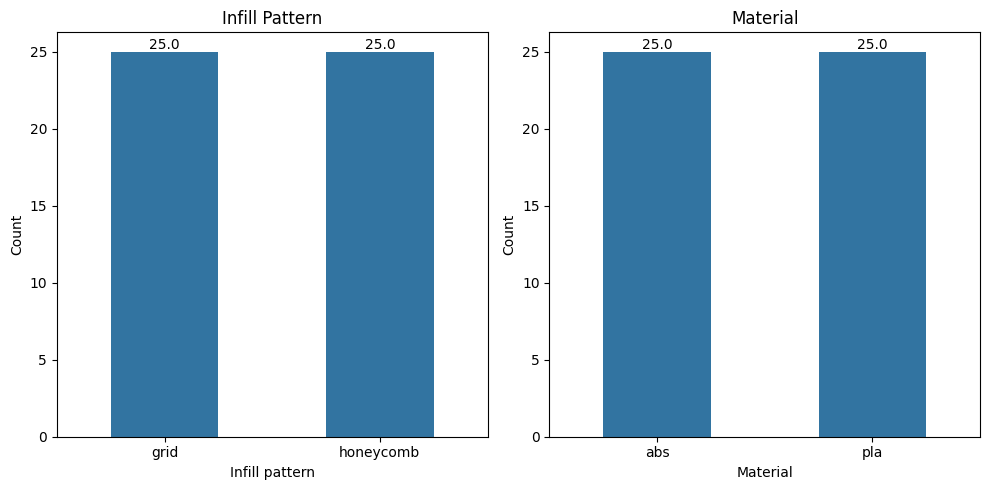

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
value,count=np.unique(data['infill_pattern'],return_counts=True)
bars=sns.barplot(x=value,y=count,width=0.5)
# Add value labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.title('Infill Pattern')
plt.xlabel('Infill pattern')
plt.ylabel('Count')
# plt.show()

# plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
value,count=np.unique(data['material'],return_counts=True)
sns.barplot(x=value,y=count,width=0.5)
# Add value labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.title('Material')
plt.xlabel('Material')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

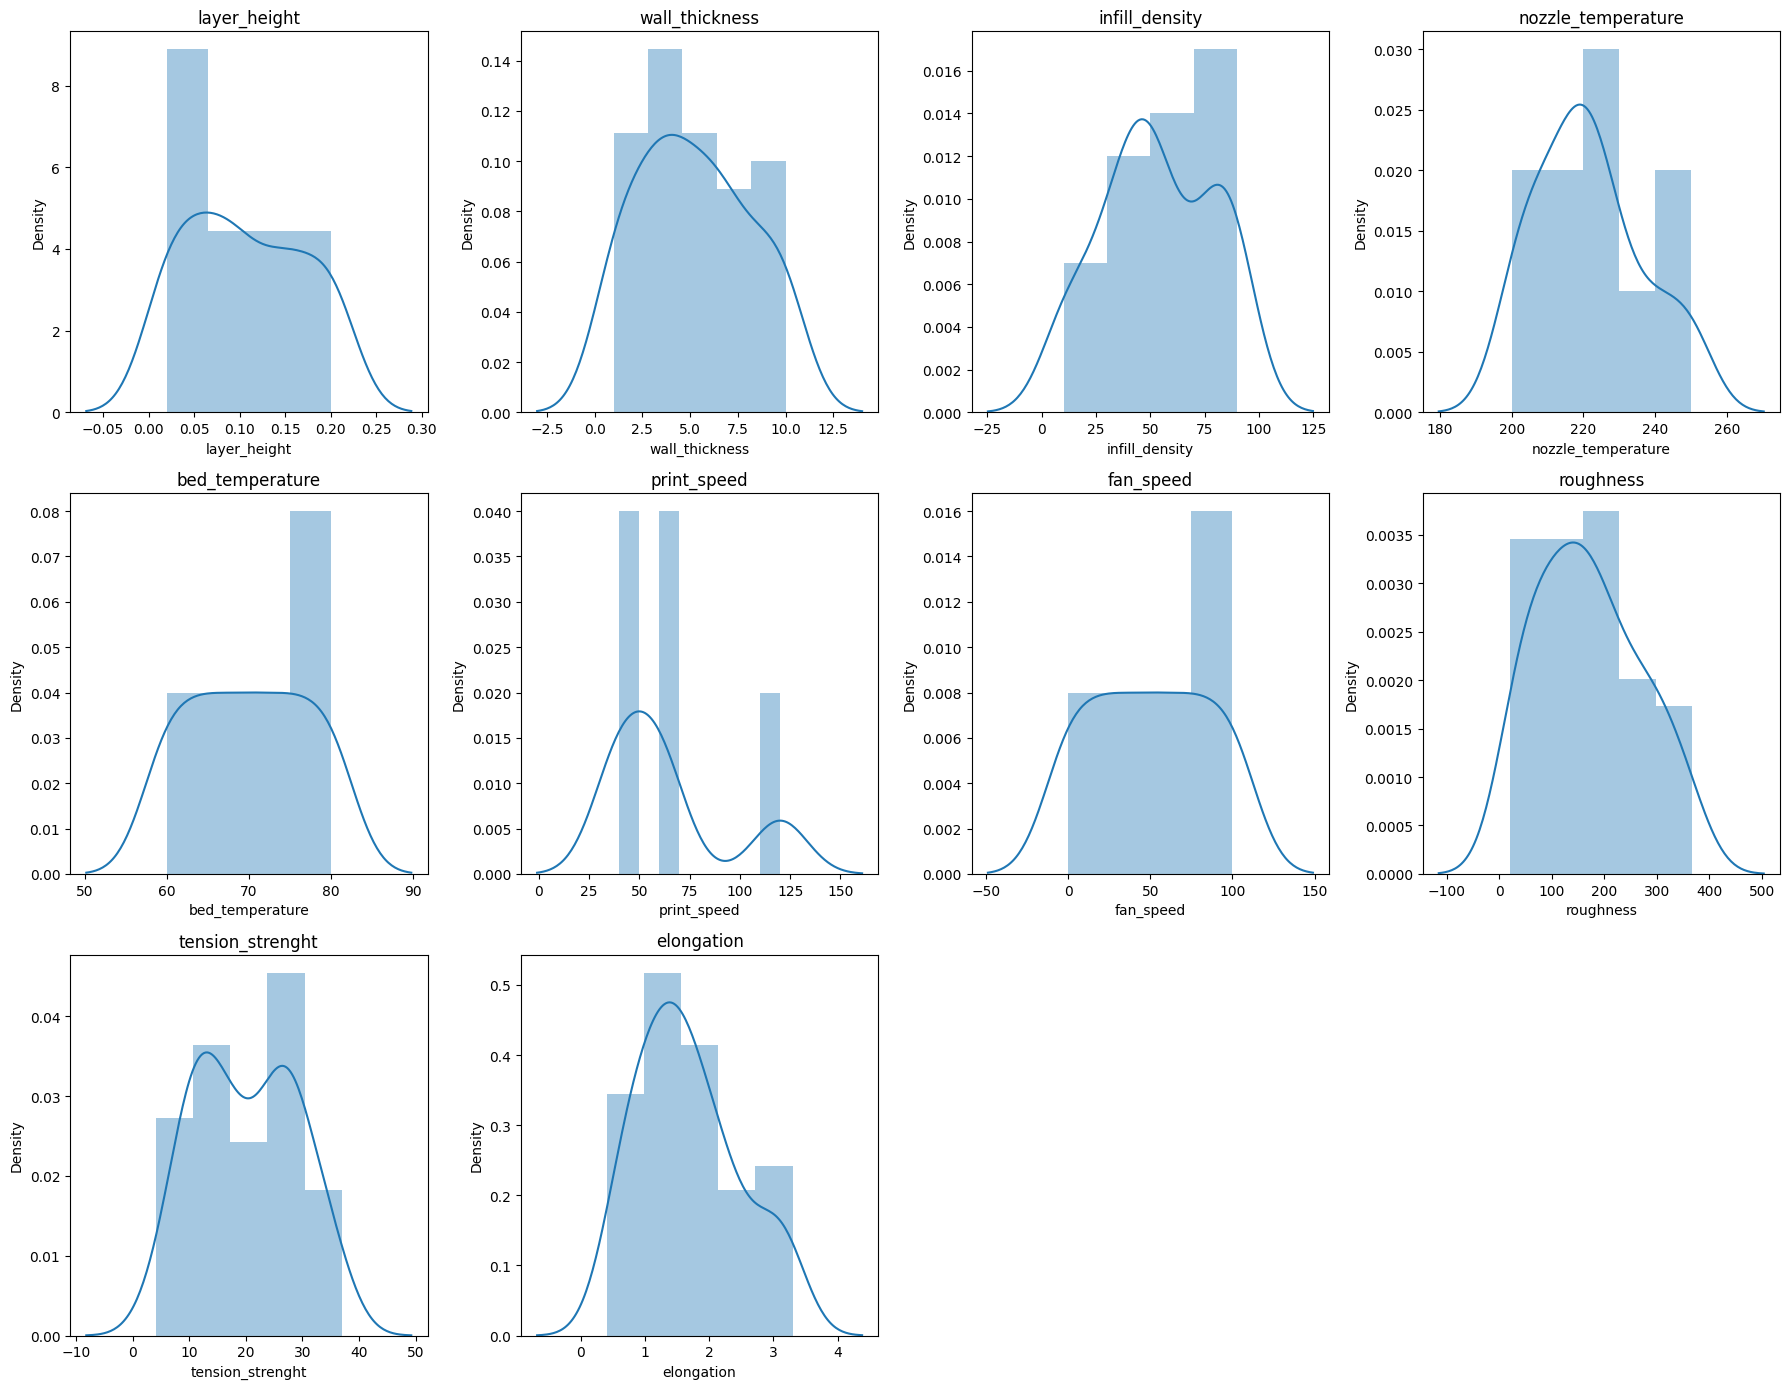

In [ ]:
def plot_numeric_data(numeric,name):
  sns.distplot(numeric)
  warnings.filterwarnings("ignore")
  plt.title(f'{name}')
  plt.xlabel(f'{name}')

plt.figure(figsize=(18,14))
n_columns=numeric.columns
for i,column in enumerate(n_columns):
    plt.subplot(3,4,i+1)
    plot_numeric_data(numeric[column],column)

plt.tight_layout()
plt.show()

In [ ]:
target=data.drop(['layer_height','wall_thickness','infill_density','infill_pattern','nozzle_temperature','bed_temperature','print_speed','material','fan_speed'],axis=1)
target.head(5)

,roughness,tension_strenght,elongation
0,25,18,1.20
1,32,16,1.40
2,40,8,0.80
3,68,10,0.50
4,92,5,0.70


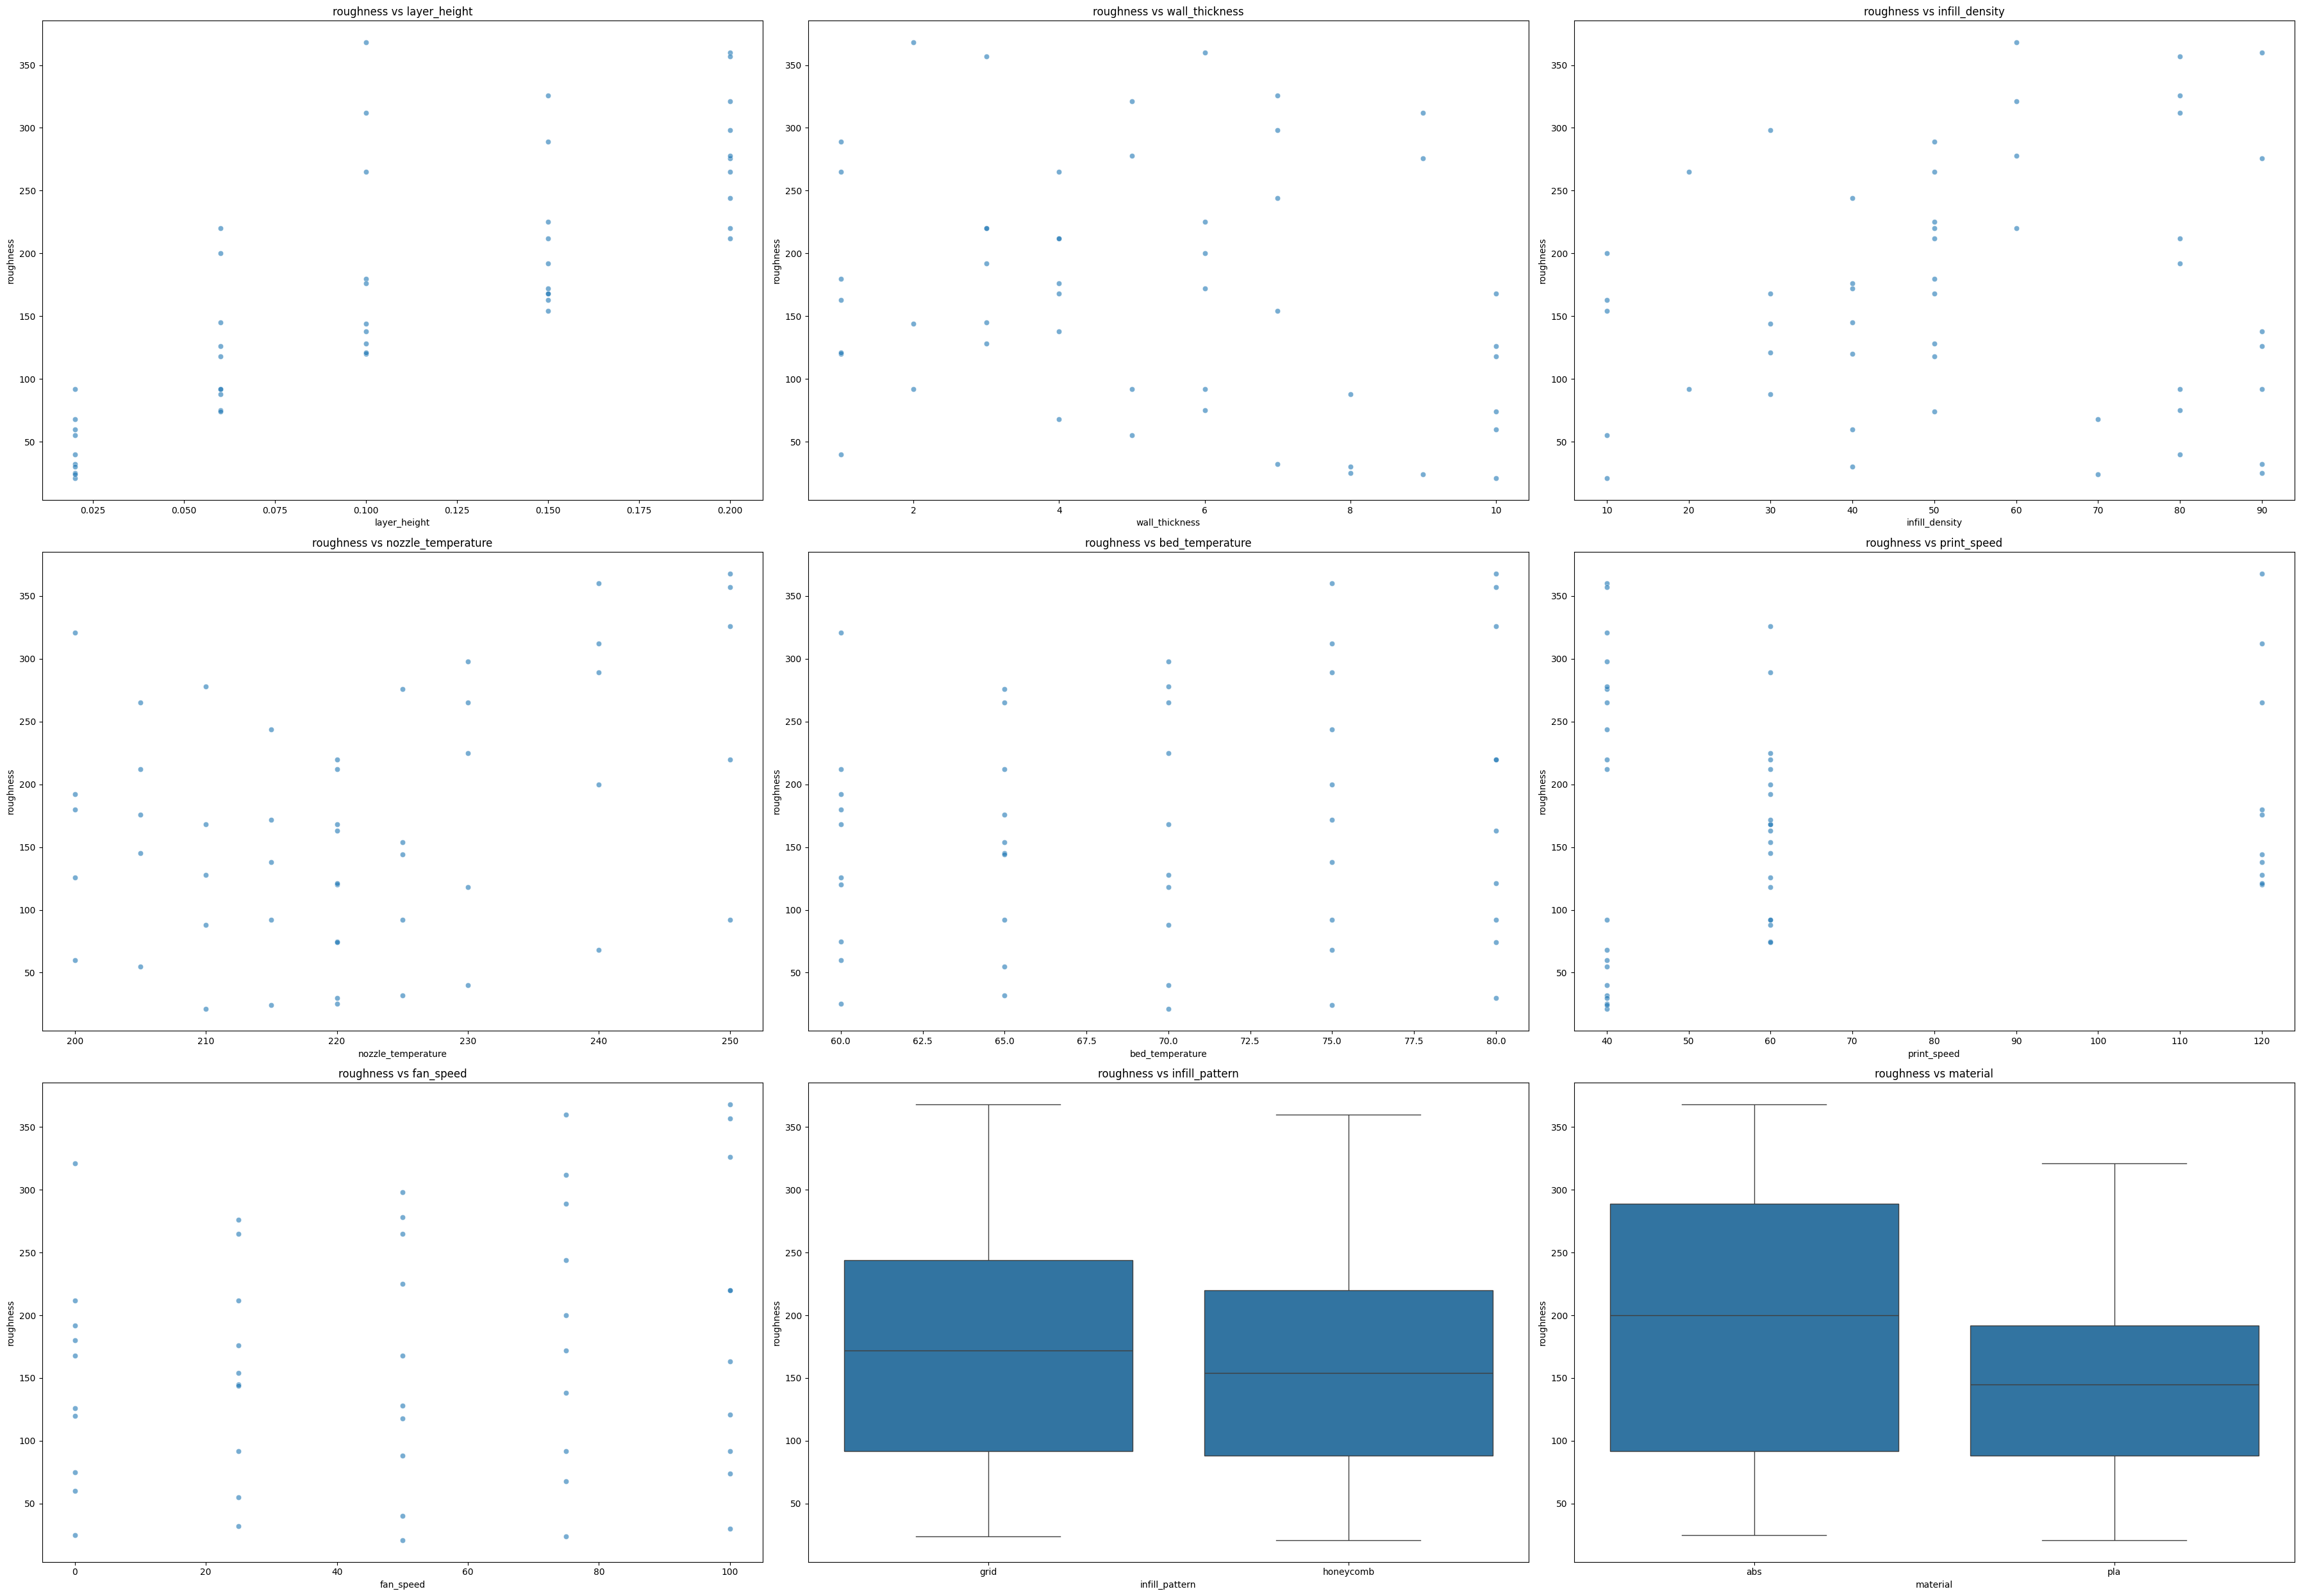

In [ ]:
# def plot_bivariate(targetdata,targetcolumn,df):
#   for column in df.select_dtypes(include=['number']).columns:
#     sns.scatterplot(y=targetdata,x=df[column],alpha=0.6)
#     plt.xlabel(column)
#     plt.ylabel(targetcolumn)
#     plt.title(f'{targetcolumn} vs {column}')
#     plt.show()

#   for column in df.select_dtypes(include=['object']).columns:
#     sns.boxplot(x=df[column],y=targetdata)
#     plt.xlabel(column)
#     plt.ylabel(f'{targetcolumn}')
#     plt.title(f'{targetcolumn} vs {column}')
#     plt.show()

plt.figure(figsize=(36,25))
target_columns=target.columns
df_features = data.drop(columns=target_columns, errors='ignore')

# for i,column in enumerate(target_columns):
#   plt.subplot(4,8,i+1)
#   plot_bivariate(target[column],target_columns,df_features)

def plot_bivariate(targetdata,targetcolumn,df):
  i=0
  for column in df.select_dtypes(include=['number']).columns:
    i+=1
    plt.subplot(3,3,i)
    sns.scatterplot(y=targetdata,x=df[column],alpha=0.6)
    plt.xlabel(column)
    plt.ylabel(targetcolumn)
    plt.title(f'{targetcolumn} vs {column}')

  for column in df.select_dtypes(include=['object']).columns:
    i+=1
    plt.subplot(3,3,i)
    sns.boxplot(x=df[column],y=targetdata)
    plt.xlabel(column)
    plt.ylabel(targetcolumn)
    plt.title(f'{targetcolumn} vs {column}')

plot_bivariate(target['roughness'],'roughness',df_features)
plt.tight_layout()
plt.show()

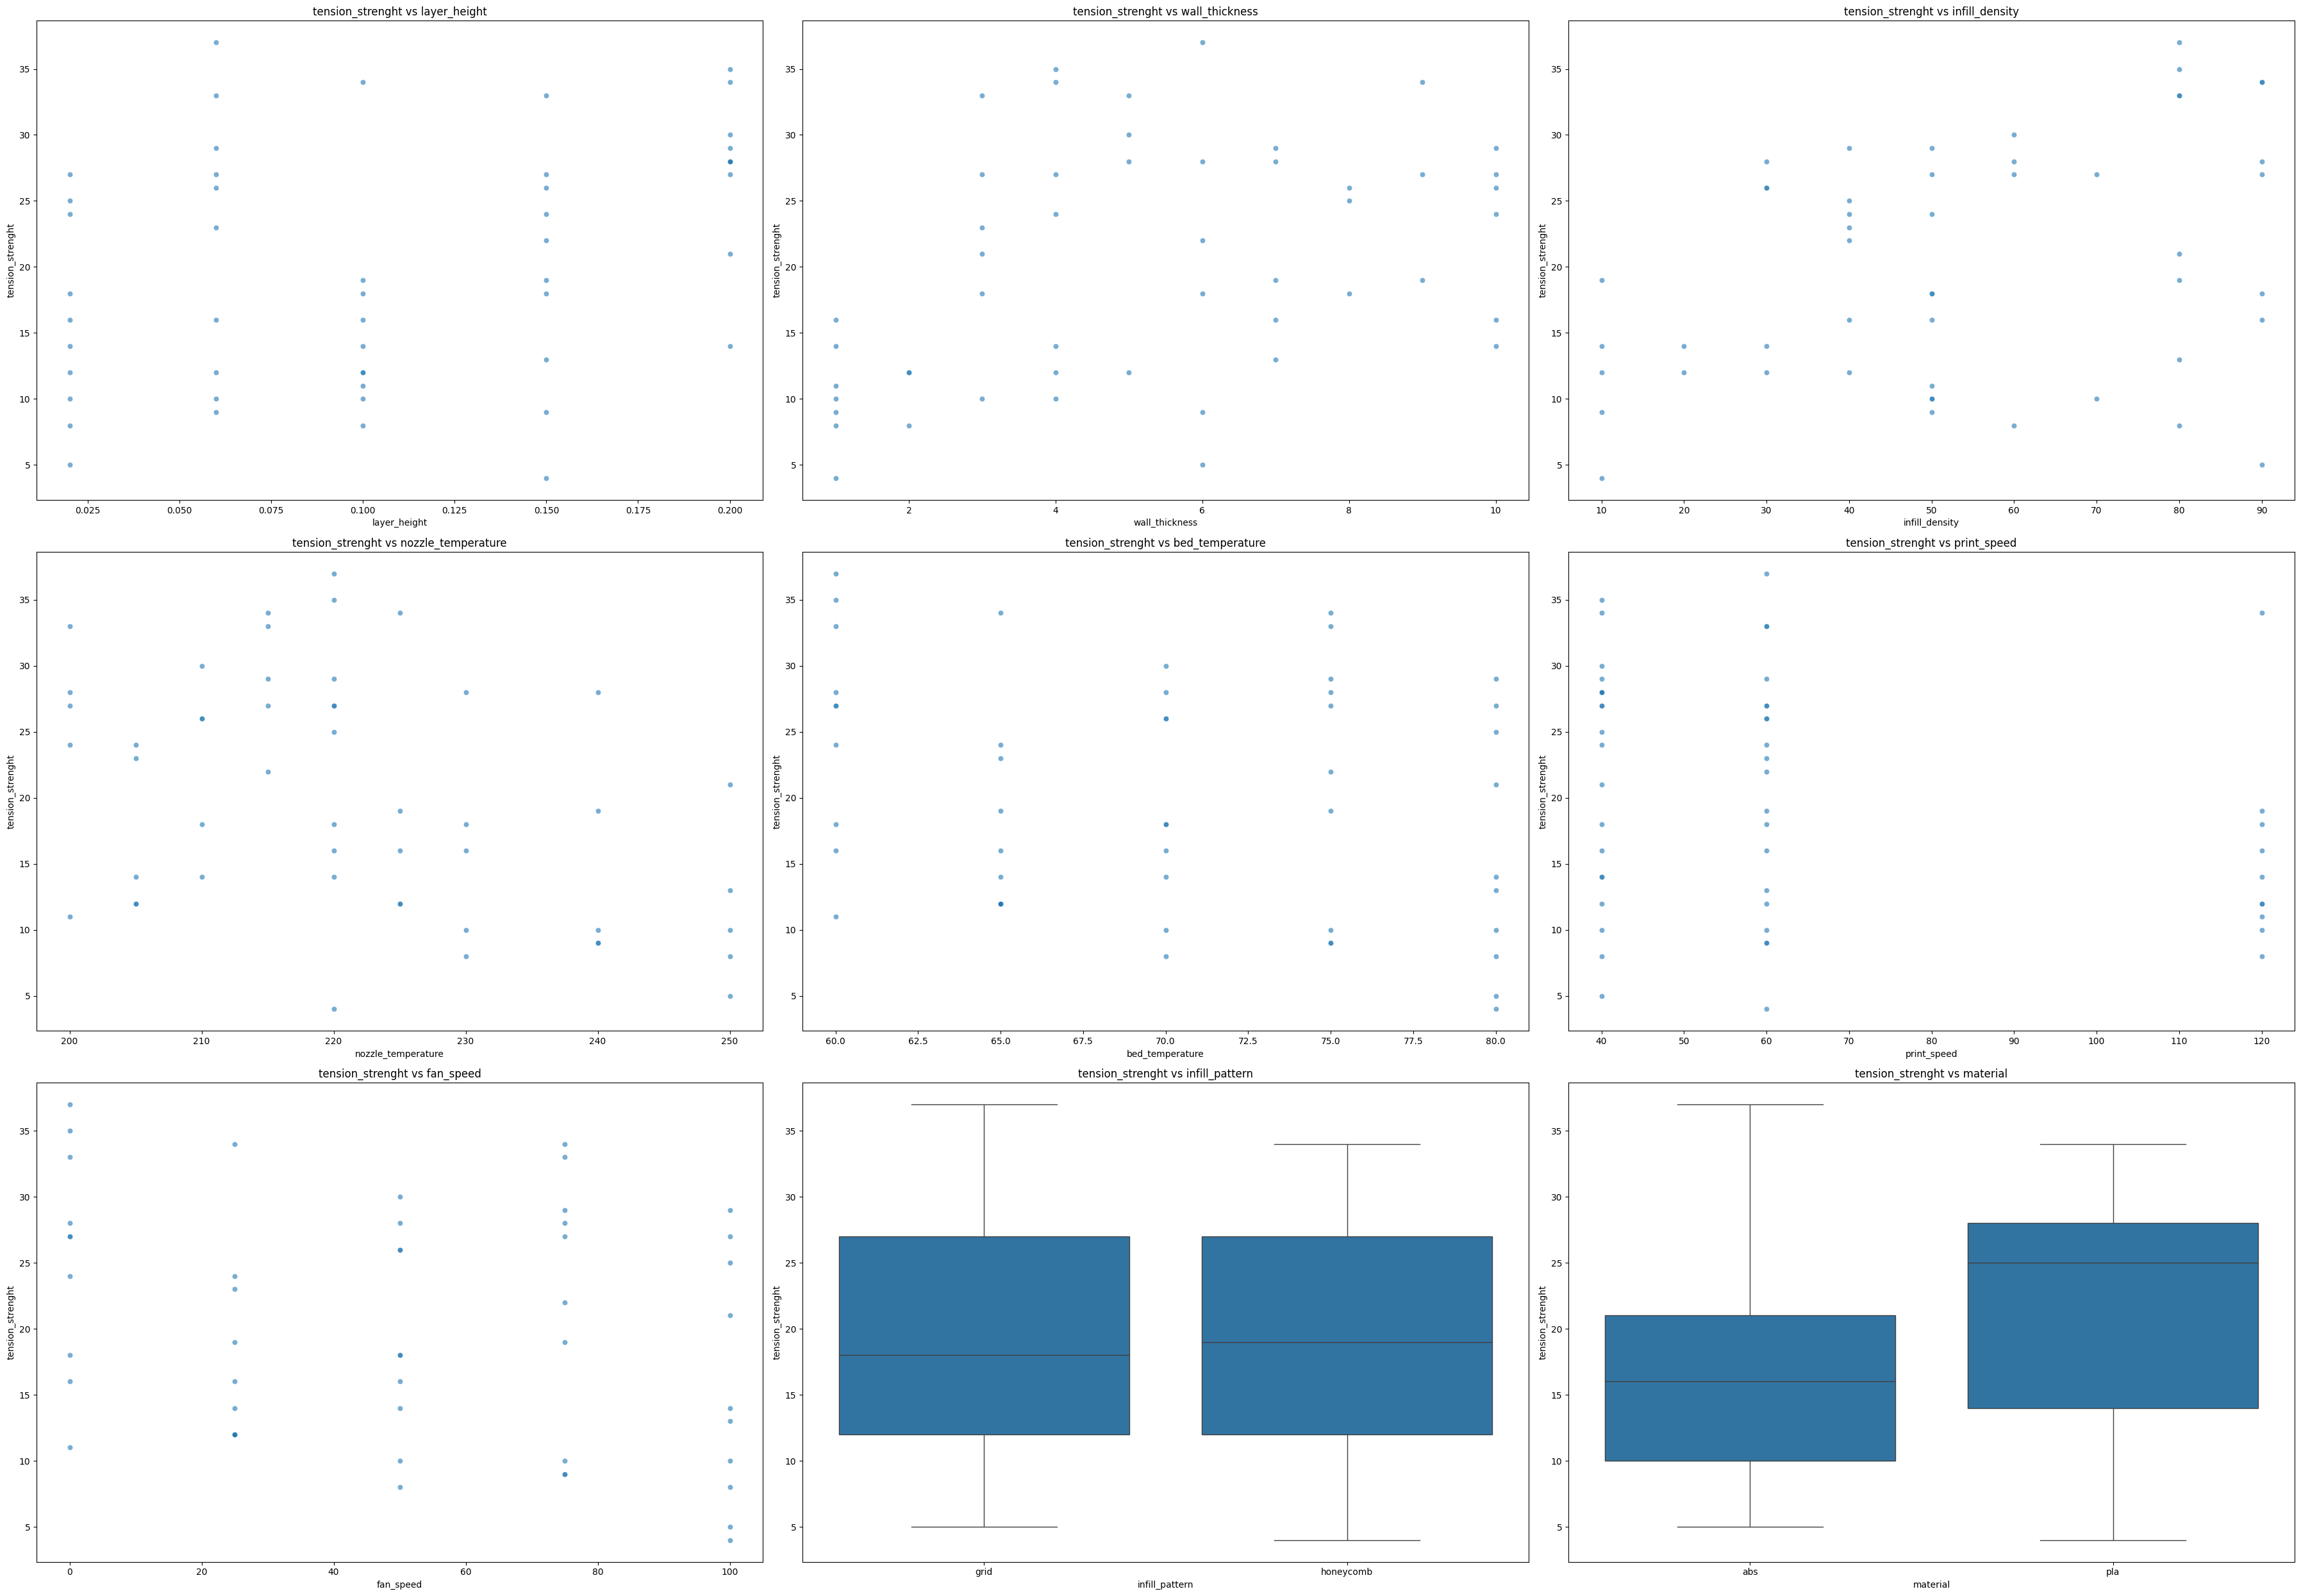

In [ ]:
def plot_bivariate(targetdata,targetcolumn,df):
  i=0
  for column in df.select_dtypes(include=['number']).columns:
    i+=1
    plt.subplot(3,3,i)
    sns.scatterplot(y=targetdata,x=df[column],alpha=0.6)
    plt.xlabel(column)
    plt.ylabel(targetcolumn)
    plt.title(f'{targetcolumn} vs {column}')

  for column in df.select_dtypes(include=['object']).columns:
    i+=1
    plt.subplot(3,3,i)
    sns.boxplot(x=df[column],y=targetdata)
    plt.xlabel(column)
    plt.ylabel(targetcolumn)
    plt.title(f'{targetcolumn} vs {column}')

plt.figure(figsize=(36,25))
plot_bivariate(target['tension_strenght'],'tension_strenght',df_features)
plt.tight_layout()
plt.show()

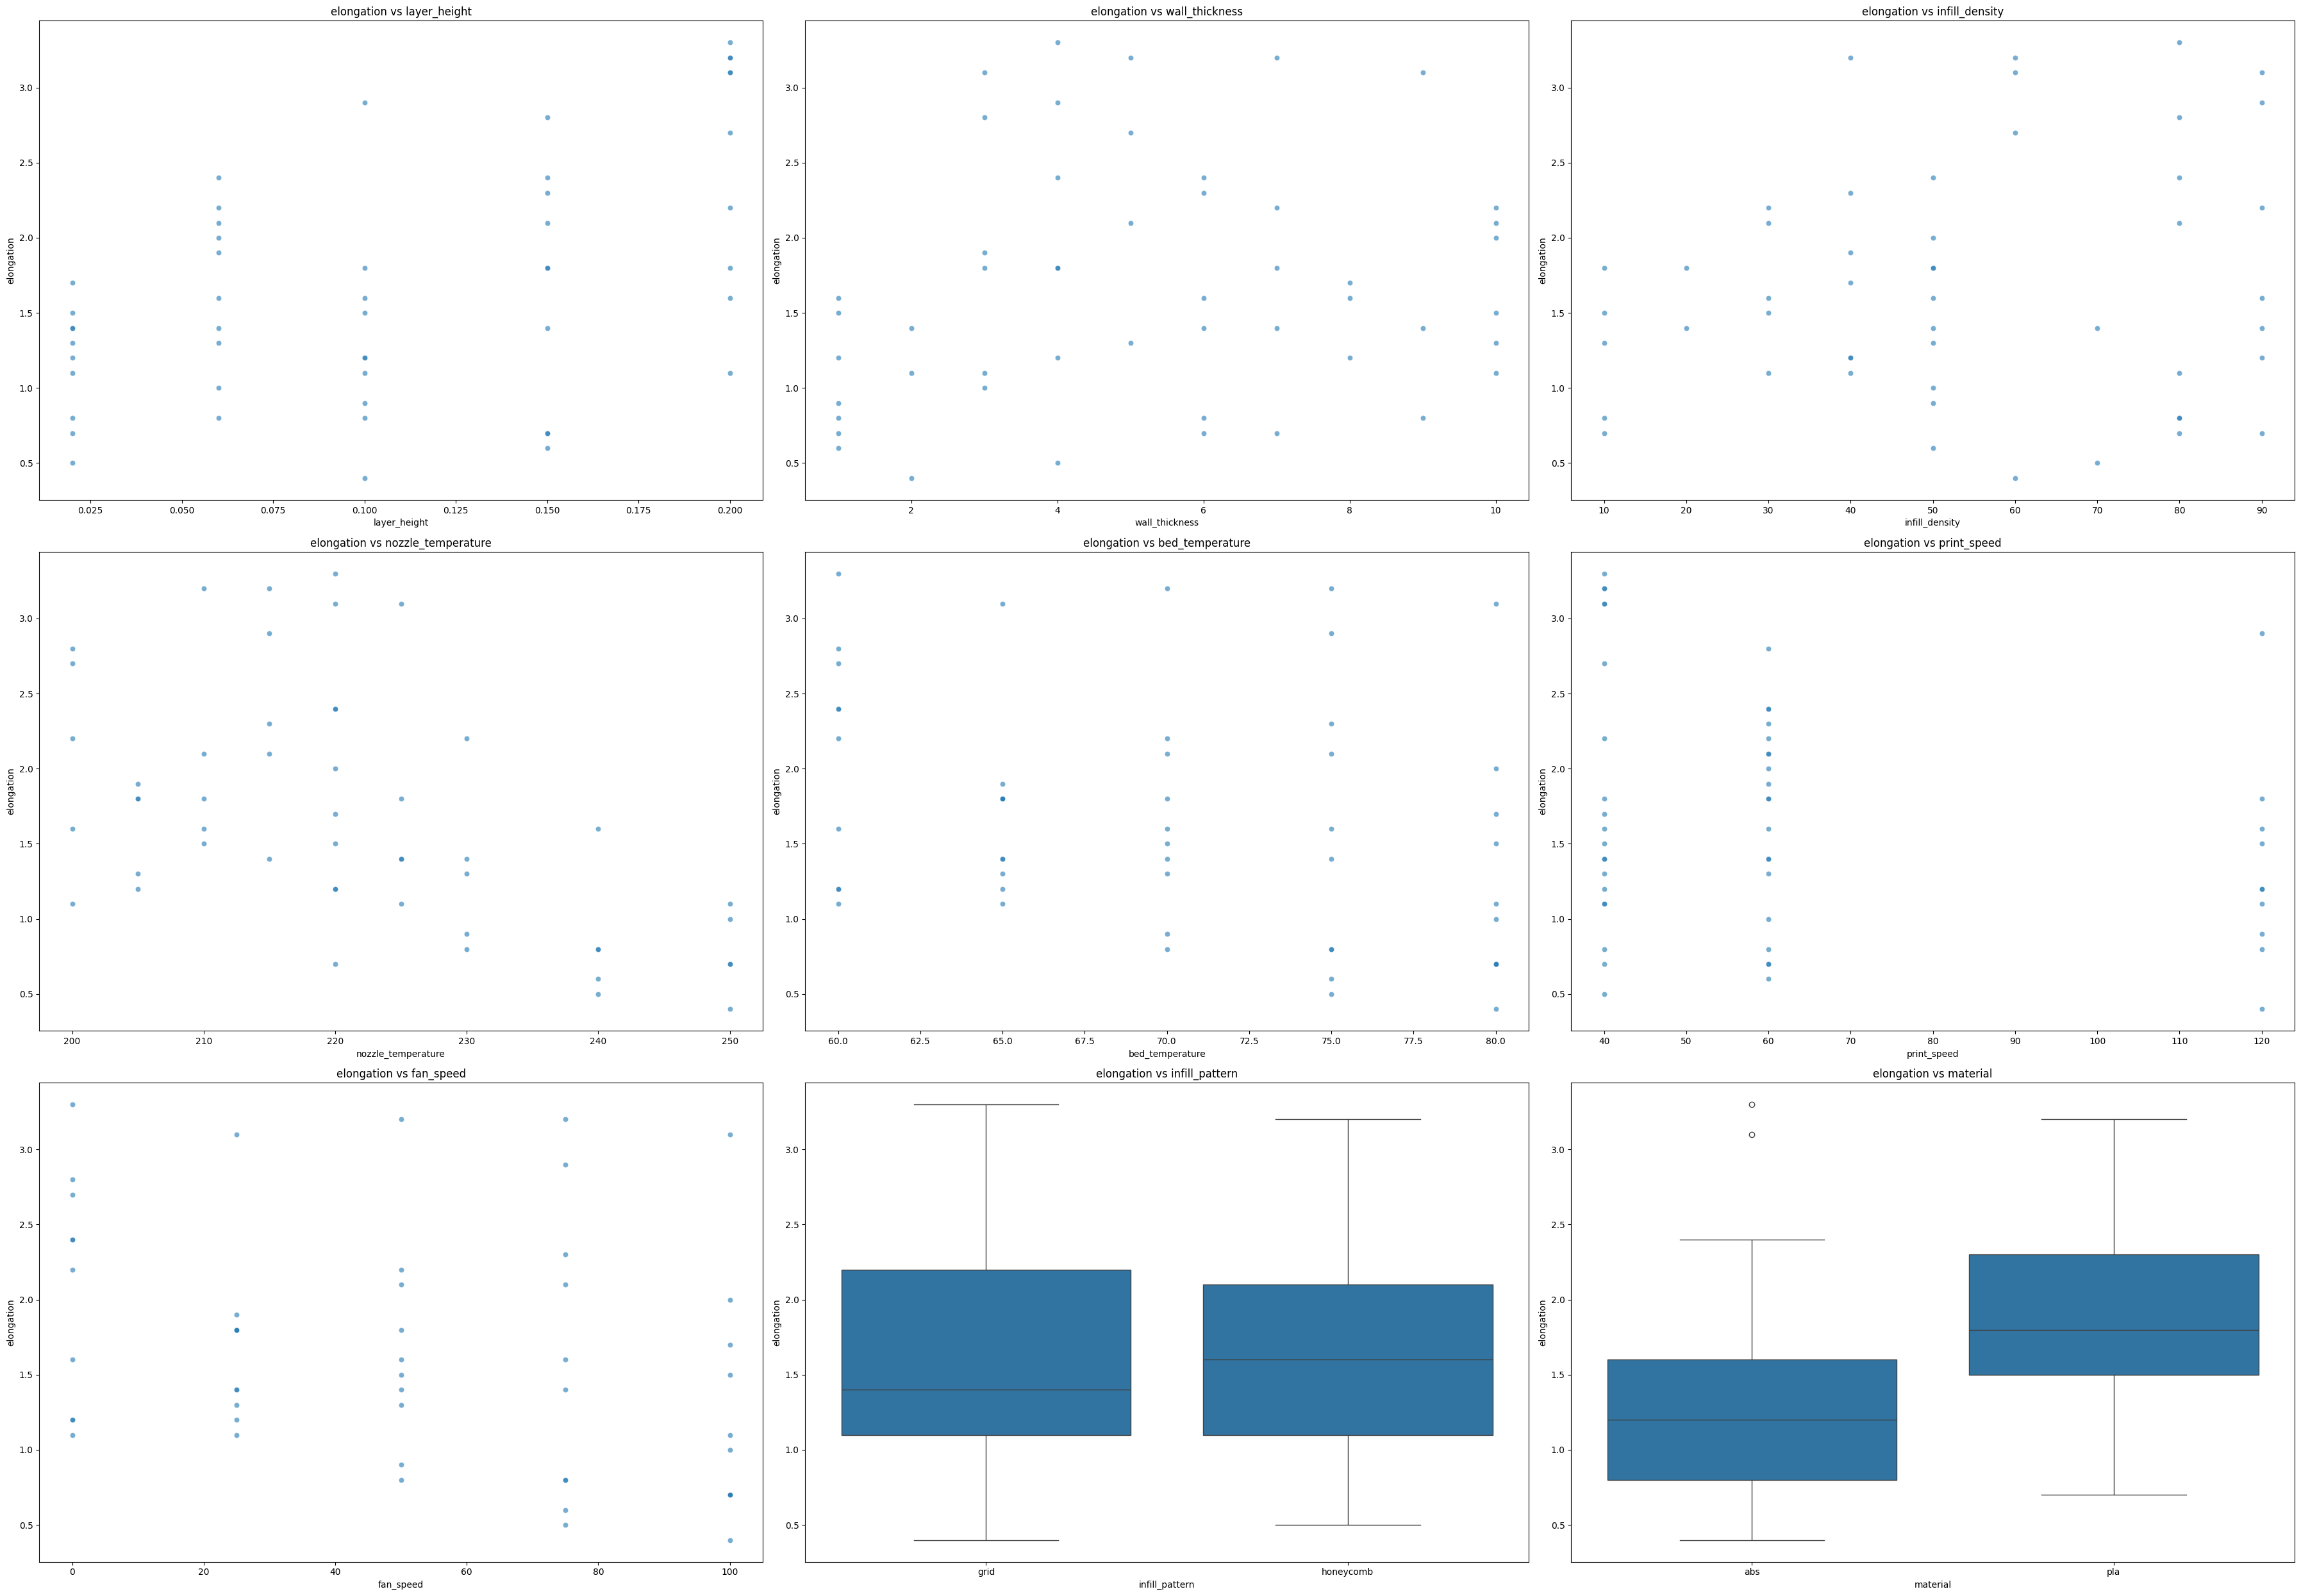

In [ ]:
def plot_bivariate(targetdata,targetcolumn,df):
  i=0
  for column in df.select_dtypes(include=['number']).columns:
    i+=1
    plt.subplot(3,3,i)
    sns.scatterplot(y=targetdata,x=df[column],alpha=0.6)
    plt.xlabel(column)
    plt.ylabel(targetcolumn)
    plt.title(f'{targetcolumn} vs {column}')

  for column in df.select_dtypes(include=['object']).columns:
    i+=1
    plt.subplot(3,3,i)
    sns.boxplot(x=df[column],y=targetdata)
    plt.xlabel(column)
    plt.ylabel(targetcolumn)
    plt.title(f'{targetcolumn} vs {column}')

plt.figure(figsize=(36,25))
plot_bivariate(target['elongation'],'elongation',df_features)
plt.tight_layout()
plt.show()

****DATA PREPROCESSING****

In [ ]:
df=data.copy()
df.head(5)

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.20
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.40
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.80
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.50
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.70


In [ ]:
df.isnull().sum()

,0
layer_height,0
wall_thickness,0
infill_density,0
infill_pattern,0
nozzle_temperature,0
bed_temperature,0
print_speed,0
material,0
fan_speed,0
roughness,0


In [ ]:
df.duplicated().sum()

0

*ENCODING DATA*

In [ ]:
# ONE-HOT ENCODING FOR CONVERTING CATEGORICAL DATA INTO NUMERICAL DATA
one_hot_encoder = OneHotEncoder(drop='first',dtype=np.int64,sparse_output=False, handle_unknown='ignore')

In [ ]:
encoded_data = one_hot_encoder.fit_transform(df[['infill_pattern',	'material']])
feature_names = one_hot_encoder.get_feature_names_out(['infill_pattern',	'material'])
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)
df = df.drop(['infill_pattern',	'material'], axis=1)
df = pd.concat([df, encoded_df], axis=1)

In [ ]:
df.head(5)

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation,infill_pattern_honeycomb,material_pla
0,0.02,8,90,220,60,40,0,25,18,1.20,0,0
1,0.02,7,90,225,65,40,25,32,16,1.40,1,0
2,0.02,1,80,230,70,40,50,40,8,0.80,0,0
3,0.02,4,70,240,75,40,75,68,10,0.50,1,0
4,0.02,6,90,250,80,40,100,92,5,0.70,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   layer_height              50 non-null     float64
 1   wall_thickness            50 non-null     int64  
 2   infill_density            50 non-null     int64  
 3   nozzle_temperature        50 non-null     int64  
 4   bed_temperature           50 non-null     int64  
 5   print_speed               50 non-null     int64  
 6   fan_speed                 50 non-null     int64  
 7   roughness                 50 non-null     int64  
 8   tension_strenght          50 non-null     int64  
 9   elongation                50 non-null     float64
 10  infill_pattern_honeycomb  50 non-null     int64  
 11  material_pla              50 non-null     int64  
dtypes: float64(2), int64(10)
memory usage: 4.8 KB


In [ ]:
X=df.drop(['roughness',	'tension_strenght',	'elongation'],axis=1)
Y=df[['roughness','tension_strenght','elongation']]

*TRAINING AND SPLITTING DATA*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45, 9), (5, 9), (45, 3), (5, 3))

*CHECKING FOR OUTLIERS*

In [ ]:
def iqr_outlier(data):
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return (data < lower_bound) | (data > upper_bound)

In [ ]:
outlier_data = {}
for col in X_train.columns:
    outlier_data[col] = iqr_outlier(X_train[col])

In [ ]:
# for col in X_train.columns:
#     outliers = findoutliers(X_train[col])
#     X_train = X_train[~outliers]

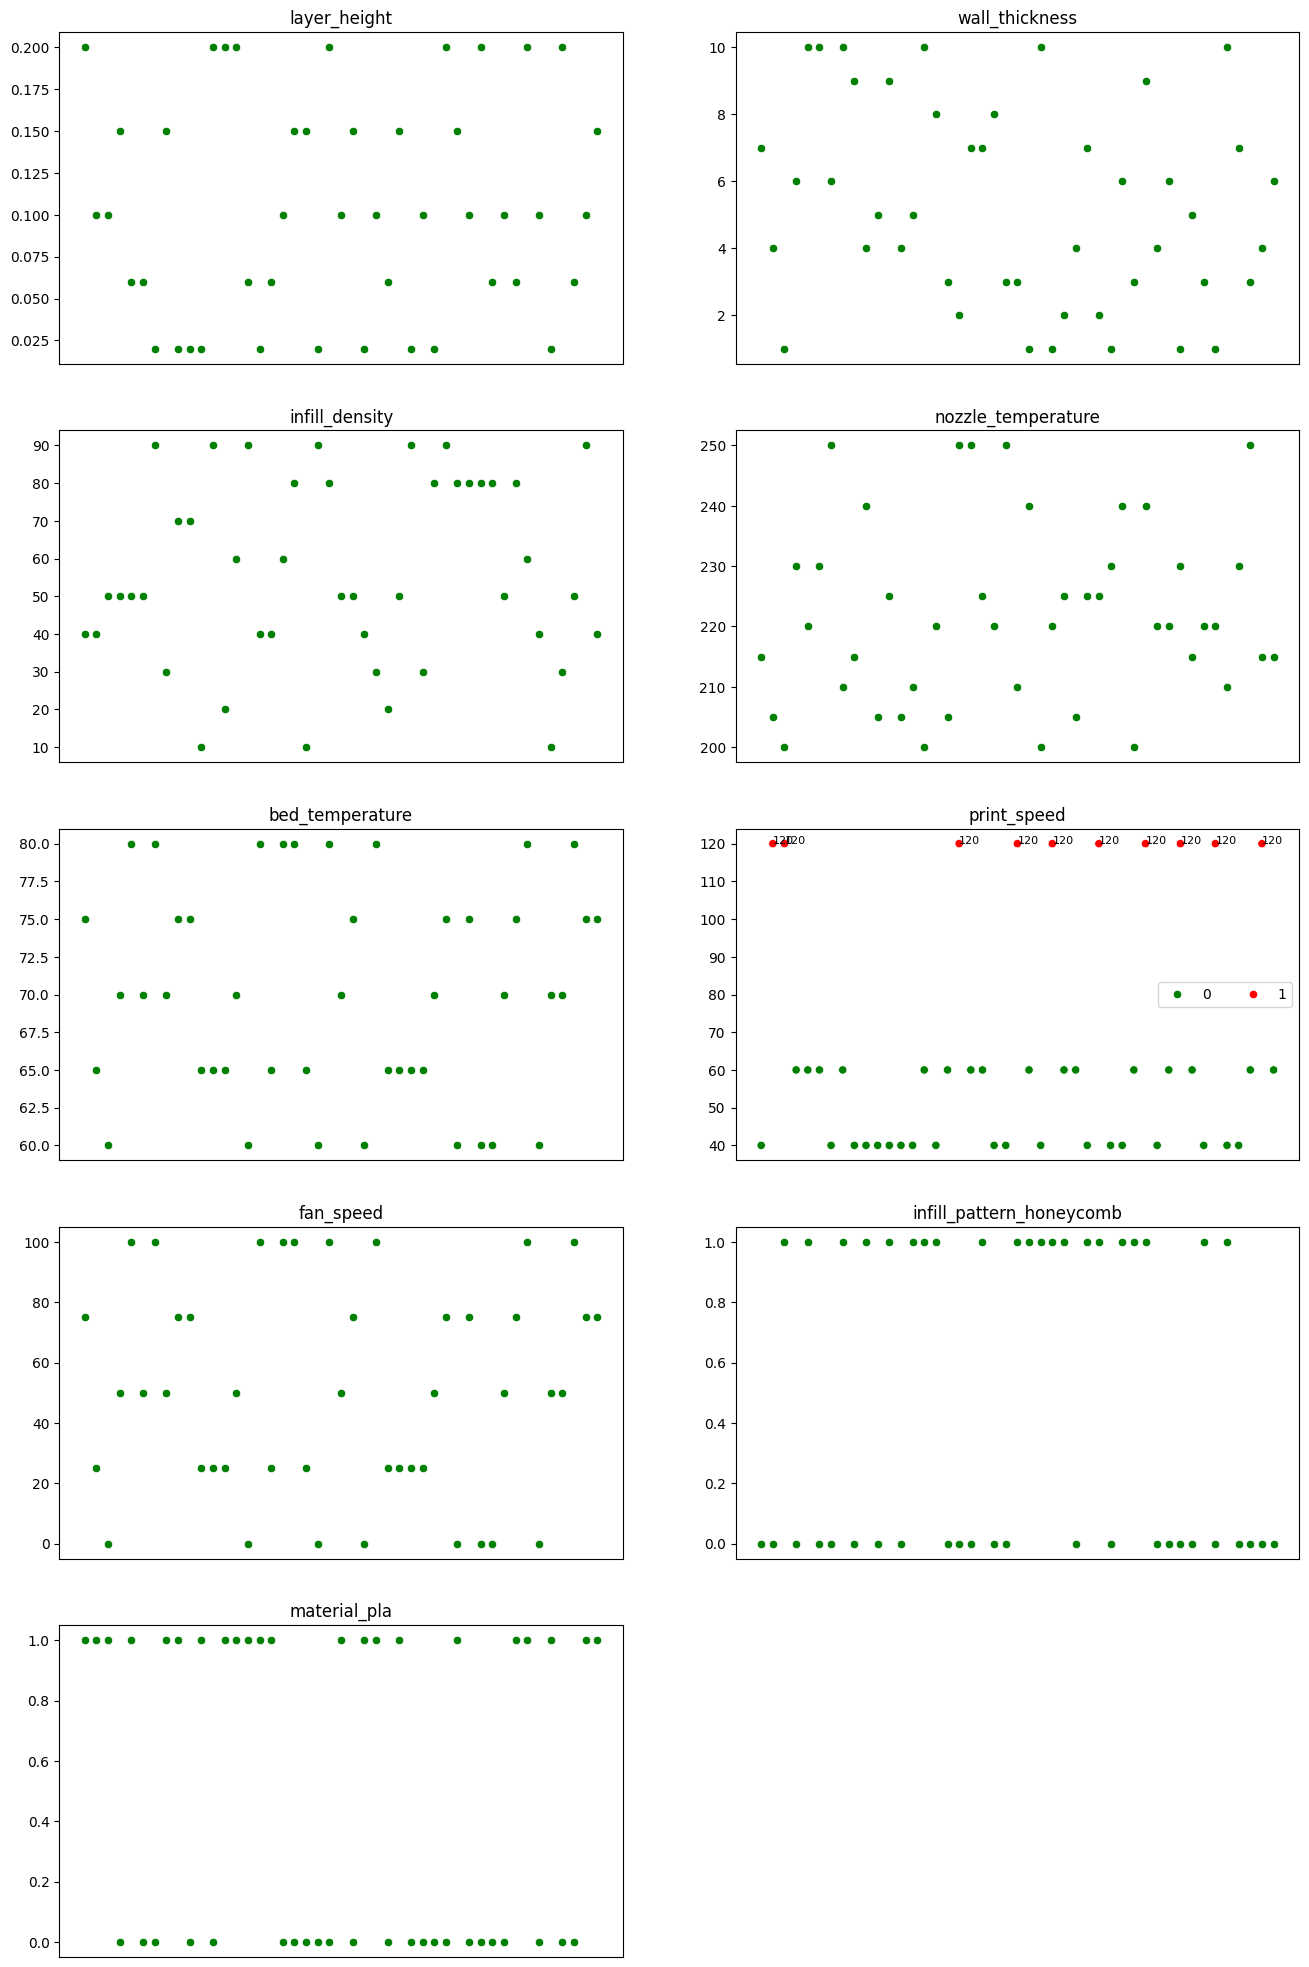

In [ ]:
def iqr_outlier(x,factor):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    min_ = q1 - factor * iqr
    max_ = q3 + factor * iqr
    result_ = pd.Series([0] * len(x), index=x.index)
    result_[((x < min_) | (x > max_))] = 1
    return result_

#SCATTER PLOTS HIGHLIGHTING OUTLIERS CALCULATED USING IQR METHOD
fig, ax = plt.subplots(5, 2, figsize=(16, 25))
row = col = 0
for n,i in enumerate(X_train.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    outliers = iqr_outlier(X_train[i], 1.5)

    if sum(outliers) == 0:
        sns.scatterplot(x = np.arange(len(X_train[i])), y = X_train[i], ax = ax[row, col], legend=False, color = 'green')
    else:
        sns.scatterplot(x = np.arange(len(X_train[i])), y = X_train[i], ax = ax[row, col], hue = outliers, palette = ['green','red'])
    for x,y in zip(np.arange(len(X_train[i]))[outliers == 1], X_train[i][outliers == 1]):
        ax[row,col].text(x = x, y = y, s = y, fontsize = 8)
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1
ax[row,col].axis('off')
plt.show()

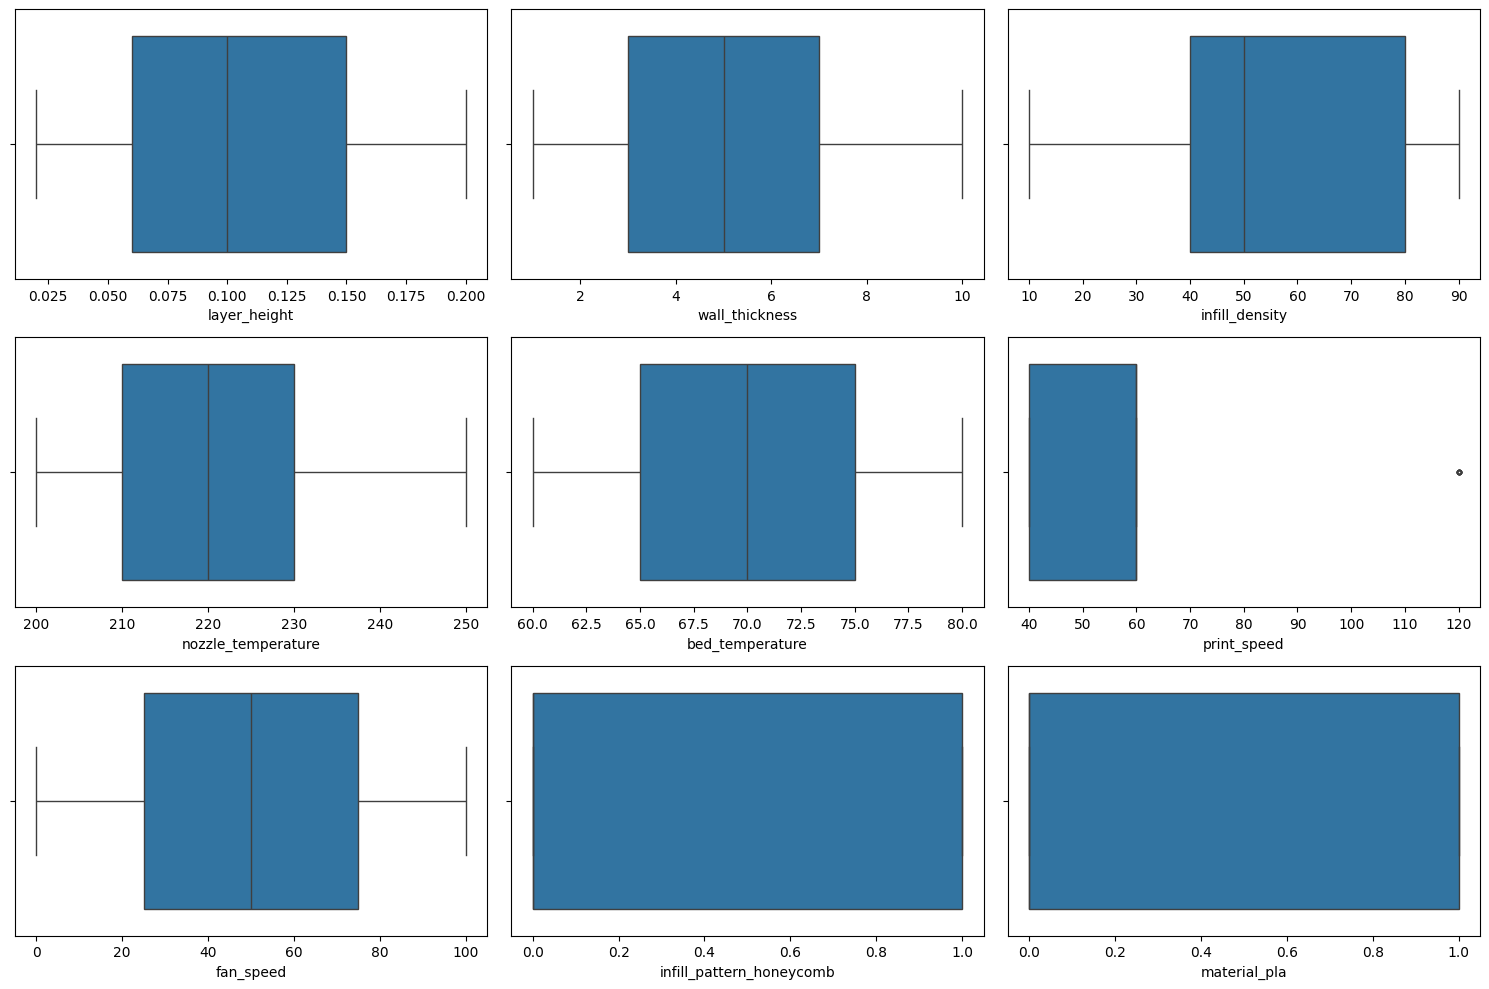

In [ ]:
numerical_columns = X_train.select_dtypes(include=['number']).columns

n_cols = 3
n_rows = (len(numerical_columns) - 1) // n_cols + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Create boxplots for each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=col, data=X_train, ax=axes[i], orient='h',fliersize=3)

# Remove any unused subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

*SCALING THE DATA*

In [ ]:
scaler = StandardScaler()
columns=X_train.columns
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=columns)
X_train.head(8)

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,infill_pattern_honeycomb,material_pla
0,1.49,0.59,-0.65,-0.47,0.70,-0.81,0.70,-0.94,1.02
1,-0.06,-0.43,-0.65,-1.14,-0.74,1.79,-0.74,-0.94,1.02
2,-0.06,-1.45,-0.24,-1.48,-1.45,1.79,-1.45,1.07,1.02
3,0.72,0.25,-0.24,0.55,-0.02,-0.16,-0.02,-0.94,-0.98
4,-0.68,1.61,-0.24,-0.13,1.42,-0.16,1.42,1.07,1.02
5,-0.68,1.61,-0.24,0.55,-0.02,-0.16,-0.02,-0.94,-0.98
6,-1.31,0.25,1.40,1.90,1.42,-0.81,1.42,-0.94,-0.98
7,0.72,1.61,-1.05,-0.81,-0.02,-0.16,-0.02,1.07,1.02


*FINDING ESSENTIAL FEATURES*

Text(0.5, 1.05, 'Correlation of Features')

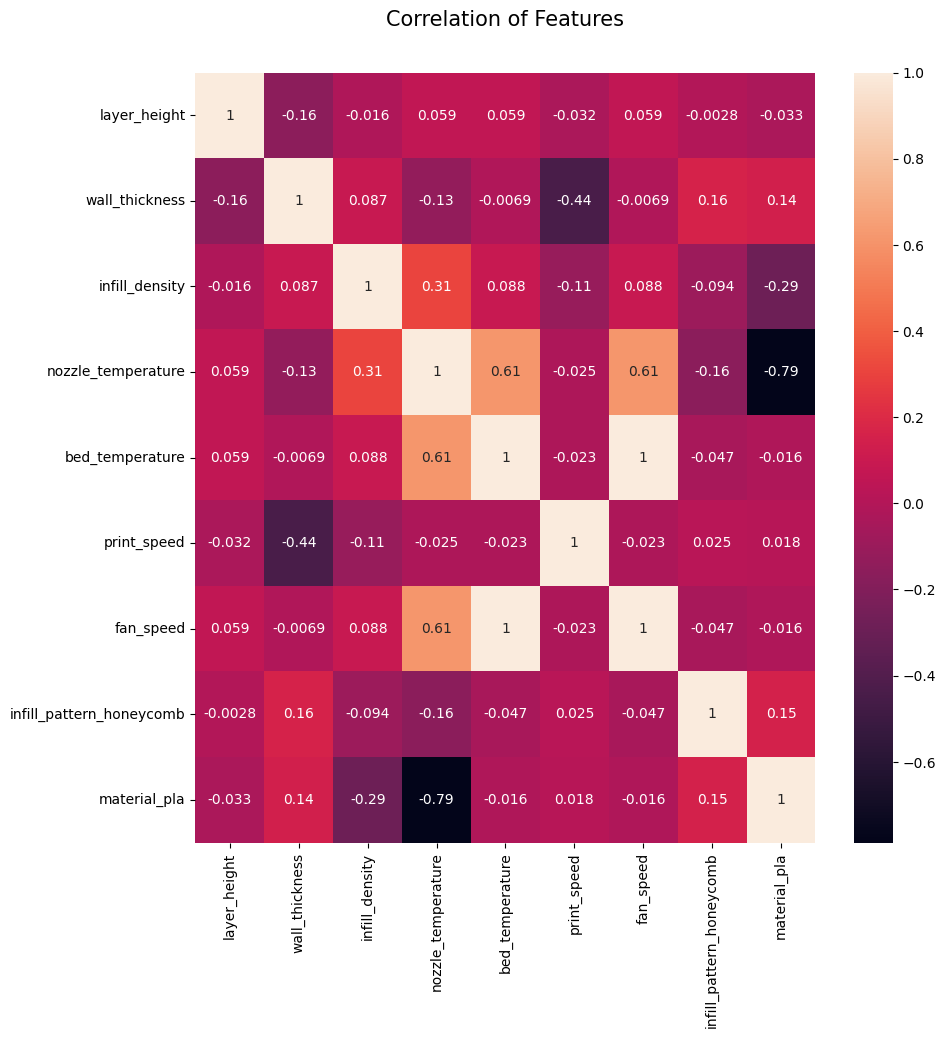

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(),annot=True)
plt.title('Correlation of Features', y=1.05, size=15)

In [ ]:
X_modified=X_train.drop(['fan_speed'],axis=1)

In [ ]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)

In [ ]:
modified_data = pd.concat([X_modified, y_train], axis=1)
modified_data.head(5)

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,infill_pattern_honeycomb,material_pla,roughness,tension_strenght,elongation
0,1.49,0.59,-0.65,-0.47,0.70,-0.81,-0.94,1.02,244,29,3.20
1,-0.06,-0.43,-0.65,-1.14,-0.74,1.79,-0.94,1.02,176,12,1.20
2,-0.06,-1.45,-0.24,-1.48,-1.45,1.79,1.07,1.02,180,11,1.60
3,0.72,0.25,-0.24,0.55,-0.02,-0.16,-0.94,-0.98,225,18,1.40
4,-0.68,1.61,-0.24,-0.13,1.42,-0.16,1.07,1.02,74,29,2.00


*FINDING CORELATION BETWEEN TARGET COLUMNS AND OTHER FEATURES*

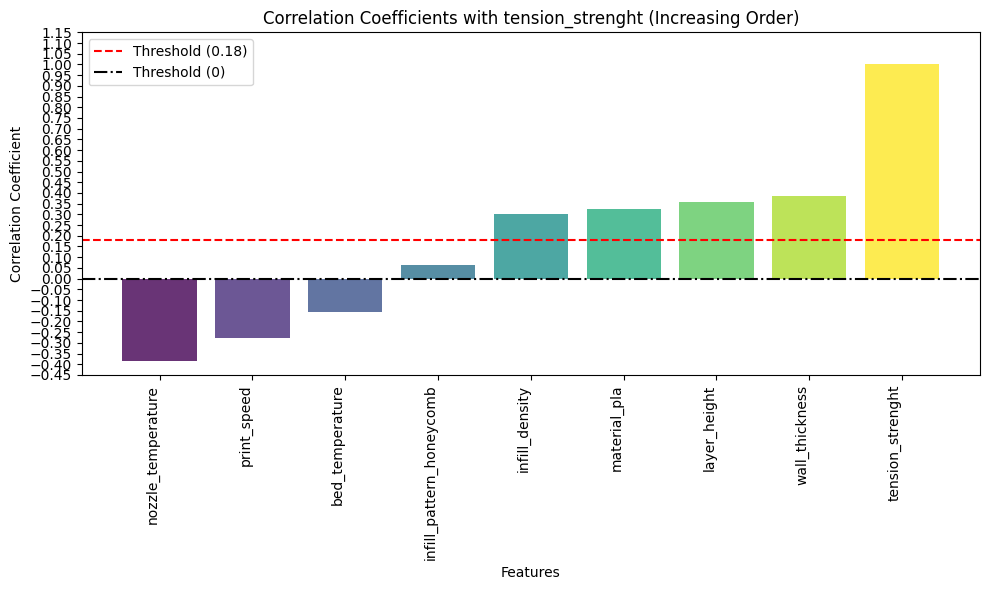

,tension_strenght
layer_height,0.36
wall_thickness,0.39
infill_density,0.30
nozzle_temperature,-0.38
bed_temperature,-0.16
print_speed,-0.28
infill_pattern_honeycomb,0.06
material_pla,0.32
tension_strenght,1.00


In [ ]:
def select_features_pearson_corr(df, target_col):

    corr_target = df.corr()[target_col]
    return corr_target

def plot_correlation_barplot(corr_series):

    plt.figure(figsize=(10, 6))

    # Sort correlation coefficients in increasing order
    corr_series_sorted = corr_series.sort_values(ascending=True)

        # Create a colormap
    cmap = plt.cm.get_cmap('viridis')
    colors = cmap(np.linspace(0, 1, len(corr_series_sorted)))

    # Create the bar plot
    plt.bar(range(len(corr_series_sorted)), corr_series_sorted, color=colors, alpha=0.8)
    plt.xlabel('Features')
    plt.ylabel('Correlation Coefficient')
    plt.title(f'Correlation Coefficients with {target_col} (Increasing Order)')

    # Set y-axis limits and subdivisions
    plt.ylim(-0.14, 1.1)  # Adjust y-axis limits to include -0.14 and 1.1
    plt.yticks(np.arange(-0.45, 1.2, 0.05))  # Set subdivisions of 0.05

    # Plot horizontal line at y=0.1
    plt.axhline(y=0.18, color='red', linestyle='--', label='Threshold (0.18)')
    plt.axhline(y=0, color='black', linestyle='-.', label='Threshold (0)')
    plt.legend()

    plt.xticks(range(len(corr_series_sorted.index.to_numpy())),
               corr_series_sorted.index.to_numpy(),
               rotation=90, ha='right'
              )
    plt.tight_layout()
    plt.show()

target_col = 'tension_strenght'

# Calculate correlation coefficients
corr_series = select_features_pearson_corr(modified_data.drop(['roughness','elongation'],axis=1), target_col)

# Plot correlation barplots
plot_correlation_barplot(corr_series)

corr_series

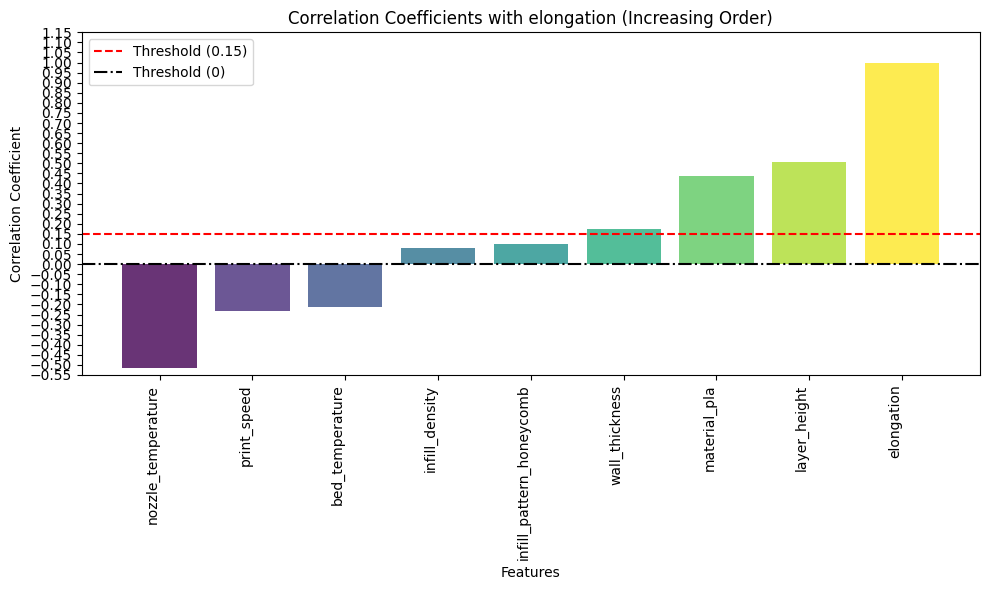

,elongation
layer_height,0.50
wall_thickness,0.17
infill_density,0.08
nozzle_temperature,-0.51
bed_temperature,-0.21
print_speed,-0.23
infill_pattern_honeycomb,0.10
material_pla,0.44
elongation,1.00


In [ ]:
def select_features_pearson_corr(df, target_col):

    corr_target = df.corr()[target_col]
    return corr_target

def plot_correlation_barplot(corr_series):

    plt.figure(figsize=(10, 6))

    # Sort correlation coefficients in increasing order
    corr_series_sorted = corr_series.sort_values(ascending=True)

        # Create a colormap
    cmap = plt.cm.get_cmap('viridis')
    colors = cmap(np.linspace(0, 1, len(corr_series_sorted)))

    # Create the bar plot
    plt.bar(range(len(corr_series_sorted)), corr_series_sorted, color=colors, alpha=0.8)
    plt.xlabel('Features')
    plt.ylabel('Correlation Coefficient')
    plt.title(f'Correlation Coefficients with {target_col} (Increasing Order)')

    # Set y-axis limits and subdivisions
    plt.ylim(-0.14, 1.1)  # Adjust y-axis limits to include -0.14 and 1.1
    plt.yticks(np.arange(-0.55, 1.2, 0.05))  # Set subdivisions of 0.05

    # Plot horizontal line at y=0.1
    plt.axhline(y=0.15, color='red', linestyle='--', label='Threshold (0.15)')
    plt.axhline(y=0, color='black', linestyle='-.', label='Threshold (0)')
    plt.legend()

    plt.xticks(range(len(corr_series_sorted.index.to_numpy())),
               corr_series_sorted.index.to_numpy(),
               rotation=90, ha='right'
              )
    plt.tight_layout()
    plt.show()

target_col = 'elongation'

# Calculate correlation coefficients
corr_series = select_features_pearson_corr(modified_data.drop(['roughness','tension_strenght'],axis=1), target_col)

# Plot correlation barplots
plot_correlation_barplot(corr_series)

corr_series

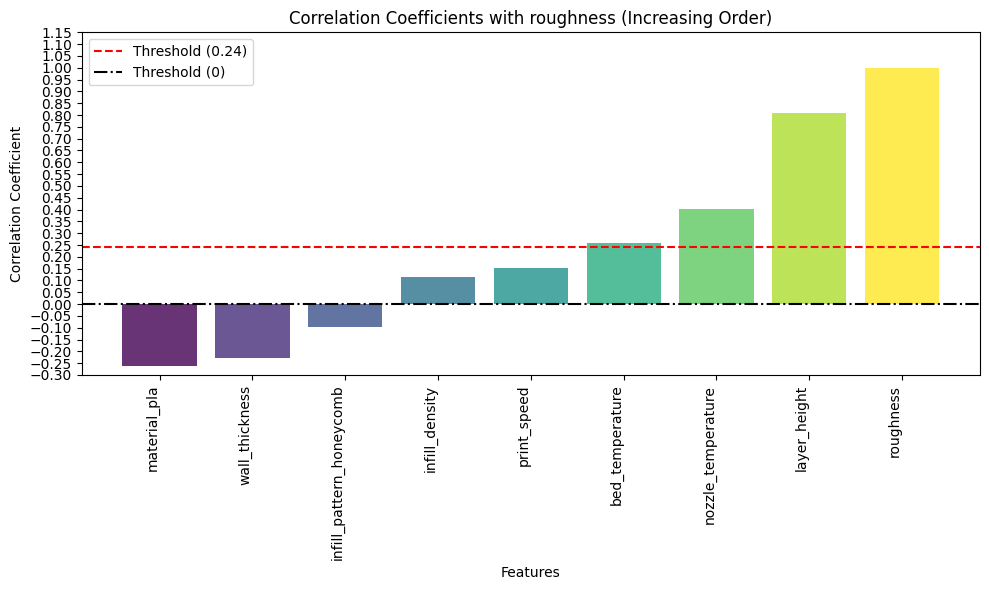

,roughness
layer_height,0.81
wall_thickness,-0.23
infill_density,0.12
nozzle_temperature,0.40
bed_temperature,0.26
print_speed,0.15
infill_pattern_honeycomb,-0.10
material_pla,-0.26
roughness,1.00


In [ ]:
def select_features_pearson_corr(df, target_col):

    corr_target = df.corr()[target_col]
    return corr_target

def plot_correlation_barplot(corr_series):

    plt.figure(figsize=(10, 6))

    # Sort correlation coefficients in increasing order
    corr_series_sorted = corr_series.sort_values(ascending=True)

        # Create a colormap
    cmap = plt.cm.get_cmap('viridis')
    colors = cmap(np.linspace(0, 1, len(corr_series_sorted)))

    # Create the bar plot
    plt.bar(range(len(corr_series_sorted)), corr_series_sorted, color=colors, alpha=0.8)
    plt.xlabel('Features')
    plt.ylabel('Correlation Coefficient')
    plt.title(f'Correlation Coefficients with {target_col} (Increasing Order)')

    # Set y-axis limits and subdivisions
    plt.ylim(-0.14, 1.1)  # Adjust y-axis limits to include -0.14 and 1.1
    plt.yticks(np.arange(-0.3, 1.2, 0.05))  # Set subdivisions of 0.05

    # Plot horizontal line at y=0.1
    plt.axhline(y=0.24, color='red', linestyle='--', label='Threshold (0.24)')
    plt.axhline(y=0, color='black', linestyle='-.', label='Threshold (0)')
    plt.legend()

    plt.xticks(range(len(corr_series_sorted.index.to_numpy())),
               corr_series_sorted.index.to_numpy(),
               rotation=90, ha='right'
              )
    plt.tight_layout()
    plt.show()

target_col = 'roughness'

# Calculate correlation coefficients
corr_series = select_features_pearson_corr(modified_data.drop(['elongation','tension_strenght'],axis=1), target_col)

# Plot correlation barplots
plot_correlation_barplot(corr_series)

corr_series

***MODELS***

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.base import clone # Import clone
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


def evaluate_regressors(df_X, df_y, model, cv=5):
    results = {}

    # Use KFold for more control over cross-validation splitting
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    scores = []
    predictions = []

    for train_index, val_index in kf.split(df_X):
        X_train_fold, X_val_fold = df_X.iloc[train_index], df_X.iloc[val_index]
        y_train_fold, y_val_fold = df_y.iloc[train_index], df_y.iloc[val_index]

        # Create a copy of the model for each fold
        model_fold = clone(model)

        model_fold.fit(X_train_fold, y_train_fold)

        fold_predictions = model_fold.predict(X_val_fold)
        predictions.extend(fold_predictions)

        fold_score = r2_score(y_val_fold, fold_predictions)  # Or any other scoring metric
        scores.append(fold_score)

    mean_r2 = np.mean(scores)
    mse = mean_squared_error(df_y, predictions)
    mae = mean_absolute_error(df_y, predictions)

    result = {
        'Mean R²': mean_r2,
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae
    }

    return result


In [ ]:
scaler = StandardScaler()
test_columns=X_test.columns
X_test=scaler.fit_transform(X_test)
X_test=pd.DataFrame(X_test,columns=test_columns)

X_test_modified = X_test.drop(['fan_speed'],axis=1)

In [ ]:
models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=0.1),
        'Lasso Regression': Lasso(alpha=0.1),
        'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.7),
        'Bayesian Ridge': BayesianRidge(),
        'Decision Tree': DecisionTreeRegressor(max_depth=5),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(learning_rate=0.1, random_state=40),
        'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
        'XGBoost': xgb.XGBRegressor(learning_rate=0.1, random_state=42),
        'Support Vector Machine': SVR(kernel='rbf')
    }

***FINDING EFFICIENT MODELS FOR TARGET COLUMNS***

In [ ]:
for name, model in models.items():
  print(f"Evaluating {name}...")
  model.fit(X_modified.drop(['infill_pattern_honeycomb','infill_density','print_speed'],axis=1), y_train['roughness'])
  results = evaluate_regressors(X_modified.drop(['infill_pattern_honeycomb','infill_density','print_speed'],axis=1), y_train['roughness'], model)
  test_pred = model.predict(X_test_modified.drop(['infill_pattern_honeycomb','infill_density','print_speed'],axis=1))
  print(results)
  print(f"MAE on test data: {mean_absolute_error(y_test['roughness'], test_pred)}")
  print(f"MSE on test data: {mean_squared_error(y_test['roughness'], test_pred)}")
  print(f"R2 on test data: {r2_score(y_test['roughness'], test_pred)}")
  print('-----------------------------------')

Evaluating Linear Regression...
{'Mean R²': 0.8034143546027245, 'Mean Squared Error': 15371.033008308816, 'Mean Absolute Error': 99.00939584383401}
MAE on test data: 47.153149283658685
MSE on test data: 2964.435118273542
R2 on test data: 0.4863755079573183
-----------------------------------
Evaluating Ridge Regression...
{'Mean R²': 0.7974124704122465, 'Mean Squared Error': 15049.437090531726, 'Mean Absolute Error': 98.52477086824786}
MAE on test data: 49.38065364009158
MSE on test data: 3087.141091443711
R2 on test data: 0.4651152035061835
-----------------------------------
Evaluating Lasso Regression...
{'Mean R²': 0.8023161929427655, 'Mean Squared Error': 15271.167595381854, 'Mean Absolute Error': 98.8693507839963}
MAE on test data: 47.85899655693255
MSE on test data: 3000.613843690263
R2 on test data: 0.4801071031100106
-----------------------------------
Evaluating Elastic Net...
{'Mean R²': 0.7353963930087902, 'Mean Squared Error': 14295.592525826014, 'Mean Absolute Error': 97.

In [ ]:
# K-Nearest for roughness

In [ ]:
for name, model in models.items():
  print(f"Evaluating {name}...")
  model.fit(X_modified.drop(['infill_pattern_honeycomb','bed_temperature'],axis=1), y_train['tension_strenght'])
  results = evaluate_regressors(X_modified.drop(['infill_pattern_honeycomb','bed_temperature'],axis=1), y_train['tension_strenght'], model)
  test_pred = model.predict(X_test_modified.drop(['infill_pattern_honeycomb','bed_temperature'],axis=1))
  print(results)
  print(f"MAE on test data: {mean_absolute_error(y_test['tension_strenght'], test_pred)}")
  print(f"MSE on test data: {mean_squared_error(y_test['tension_strenght'], test_pred)}")
  print(f"R2 on test data: {r2_score(y_test['tension_strenght'], test_pred)}")
  print('-----------------------------------')

Evaluating Linear Regression...
{'Mean R²': 0.2512173487418937, 'Mean Squared Error': 126.3183839975487, 'Mean Absolute Error': 9.398166037328329}
MAE on test data: 6.191382023820898
MSE on test data: 45.94935100984724
R2 on test data: 0.5571573726884422
-----------------------------------
Evaluating Ridge Regression...
{'Mean R²': 0.2539545190224171, 'Mean Squared Error': 125.90462151947276, 'Mean Absolute Error': 9.383846664848466}
MAE on test data: 6.186571705727926
MSE on test data: 45.883103826836084
R2 on test data: 0.5577958382147641
-----------------------------------
Evaluating Lasso Regression...
{'Mean R²': 0.2757545044815068, 'Mean Squared Error': 122.95944507915488, 'Mean Absolute Error': 9.300199931059518}
MAE on test data: 6.007160587021461
MSE on test data: 43.57098024895516
R2 on test data: 0.5800792188805401
-----------------------------------
Evaluating Elastic Net...
{'Mean R²': 0.28390916668205063, 'Mean Squared Error': 120.3534992511163, 'Mean Absolute Error': 9.2

In [ ]:
# Random Forest for tension strength

In [ ]:
for name, model in models.items():
  print(f"Evaluating {name}...")
  model.fit(X_modified.drop(['infill_pattern_honeycomb','infill_density'],axis=1), y_train['elongation'])
  results = evaluate_regressors(X_modified.drop(['infill_pattern_honeycomb','infill_density'],axis=1), y_train['elongation'], model)
  test_pred = model.predict(X_test_modified.drop(['infill_pattern_honeycomb','infill_density'],axis=1))
  print(results)
  print(f"MAE on test data: {mean_absolute_error(y_test['elongation'], test_pred)}")
  print(f"MSE on test data: {mean_squared_error(y_test['elongation'], test_pred)}")
  print(f"R2 on test data: {r2_score(y_test['elongation'], test_pred)}")
  print('-----------------------------------')

Evaluating Linear Regression...
{'Mean R²': 0.31700031664793576, 'Mean Squared Error': 0.9686103340324655, 'Mean Absolute Error': 0.693165613659257}
MAE on test data: 0.5528833316504287
MSE on test data: 0.4120806490468191
R2 on test data: 0.374118090755135
-----------------------------------
Evaluating Ridge Regression...
{'Mean R²': 0.33194423668913353, 'Mean Squared Error': 0.9209633241276434, 'Mean Absolute Error': 0.6827267353840069}
MAE on test data: 0.5439182592852825
MSE on test data: 0.4006998039821107
R2 on test data: 0.39140369990566426
-----------------------------------
Evaluating Lasso Regression...
{'Mean R²': 0.3080431430080232, 'Mean Squared Error': 0.7037984365667088, 'Mean Absolute Error': 0.6455162478492005}
MAE on test data: 0.37202135330380615
MSE on test data: 0.2995822807127742
R2 on test data: 0.5449843853086662
-----------------------------------
Evaluating Elastic Net...
{'Mean R²': 0.3023390188766969, 'Mean Squared Error': 0.730815564647058, 'Mean Absolute E

In [ ]:
# Elastic Net for elongation

MODEL FOR TENSION STRENGTH

In [ ]:
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees
    'max_depth': [5, 10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum samples required at leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at each split
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Fit the model with GridSearchCV
grid_search.fit(X_modified.drop(['infill_pattern_honeycomb','bed_temperature'],axis=1), y_train['tension_strenght'])

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print(f"Best hyperparameters: {best_params}")

# Evaluate the model on the test set
y_pred = best_model.predict(X_test_modified.drop(['infill_pattern_honeycomb','bed_temperature'],axis=1))
mae = mean_absolute_error(y_test['tension_strenght'], y_pred)
print(f"Mean Absolute Error on Test Set: {mae}")

# Optionally, you can also print the best score (CV score on training data)
print(f"Best cross-validation score: {grid_search.best_score_}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Absolute Error on Test Set: 3.7880000000000003
Best cross-validation score: -4.935888888888889


In [ ]:
rbf_model = RandomForestRegressor(max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
rbf_model.fit(X_modified.drop(['infill_pattern_honeycomb','bed_temperature'],axis=1), y_train['tension_strenght'])
results = evaluate_regressors(X_modified.drop(['infill_pattern_honeycomb','bed_temperature'],axis=1), y_train['tension_strenght'], rbf_model)
test_pred = rbf_model.predict(X_test_modified.drop(['infill_pattern_honeycomb','bed_temperature'],axis=1))
print(results)
print(f"MAE on test data: {mean_absolute_error(y_test['tension_strenght'], test_pred)}")
print(f"MSE on test data: {mean_squared_error(y_test['tension_strenght'], test_pred)}")
print(f"R2 on test data: {r2_score(y_test['tension_strenght'], test_pred)}")

{'Mean R²': 0.45447829584180655, 'Mean Squared Error': 97.44416, 'Mean Absolute Error': 8.315555555555555}
MAE on test data: 3.6380000000000003
MSE on test data: 27.57306000000001
R2 on test data: 0.7342611796453353


MODEL FOR ROUGHNESS

In [ ]:
# Define the KNN model
knn = KNeighborsRegressor()

# Define the hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 10, 15],        # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]                          # Power parameter for the Minkowski metric (1 for Manhattan, 2 for Euclidean)
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_absolute_error'
)

# Fit the model with GridSearchCV
grid_search.fit(X_modified.drop(['infill_pattern_honeycomb','infill_density','print_speed'],axis=1), y_train['roughness'])

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print(f"Best hyperparameters: {best_params}")

# Evaluate the model on the test set
y_pred = best_model.predict(X_test_modified.drop(['infill_pattern_honeycomb','infill_density','print_speed'],axis=1))
mae = mean_absolute_error(y_test['roughness'], y_pred)
print(f"Mean Absolute Error on Test Set: {mae}")

# Optionally, print the best cross-validation score
print(f"Best cross-validation score: {grid_search.best_score_}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Mean Absolute Error on Test Set: 46.403707655420256
Best cross-validation score: -39.299939632517656


In [ ]:
knn_model = KNeighborsRegressor(n_neighbors= 3, p= 2, weights= 'distance')
knn_model.fit(X_modified.drop(['infill_pattern_honeycomb','infill_density','print_speed'],axis=1), y_train['roughness'])
results = evaluate_regressors(X_modified.drop(['infill_pattern_honeycomb','infill_density','print_speed'],axis=1), y_train['roughness'], knn_model)
test_pred = knn_model.predict(X_test_modified.drop(['infill_pattern_honeycomb','infill_density','print_speed'],axis=1))
print(results)
print(f"MAE on test data: {mean_absolute_error(y_test['roughness'], test_pred)}")
print(f"MSE on test data: {mean_squared_error(y_test['roughness'], test_pred)}")
print(f"R2 on test data: {r2_score(y_test['roughness'], test_pred)}")

{'Mean R²': 0.5624048213957908, 'Mean Squared Error': 16918.3557644449, 'Mean Absolute Error': 110.899981599757}
MAE on test data: 46.403707655420256
MSE on test data: 3313.806991253735
R2 on test data: 0.4258425754983479


MODEL FOR ELONGATION

In [ ]:
# Define the Elastic Net model
elastic_net = ElasticNet(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'alpha': [0.1, 1.0, 10.0],          # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.9],       # Ratio between L1 and L2 regularization
    'max_iter': [1000, 5000, 10000]    # Maximum number of iterations
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_absolute_error'
)

# Fit the model with GridSearchCV
grid_search.fit(X_modified.drop(['infill_pattern_honeycomb','infill_density'],axis=1), y_train['elongation'])

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print(f"Best hyperparameters: {best_params}")

# Evaluate the model on the test set
y_pred = best_model.predict(X_test_modified.drop(['infill_pattern_honeycomb','infill_density'],axis=1))
mae = mean_absolute_error(y_test['elongation'], y_pred)
print(f"Mean Absolute Error on Test Set: {mae}")

# Optionally, print the best cross-validation score
print(f"Best cross-validation score: {grid_search.best_score_}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.5, 'max_iter': 1000}
Mean Absolute Error on Test Set: 0.416367088609245
Best cross-validation score: -0.4522529624390878


In [ ]:
enet_model = ElasticNet(alpha= 0.1, l1_ratio= 0.5, max_iter= 1000)
enet_model.fit(X_modified.drop(['infill_pattern_honeycomb','infill_density'],axis=1), y_train['elongation'])
results = evaluate_regressors(X_modified.drop(['infill_pattern_honeycomb','infill_density'],axis=1), y_train['elongation'], enet_model)
test_pred = enet_model.predict(X_test_modified.drop(['infill_pattern_honeycomb','infill_density'],axis=1))
print(results)
print(f"MAE on test data: {mean_absolute_error(y_test['elongation'], test_pred)}")
print(f"MSE on test data: {mean_squared_error(y_test['elongation'], test_pred)}")
print(f"R2 on test data: {r2_score(y_test['elongation'], test_pred)}")

{'Mean R²': 0.30764924739090044, 'Mean Squared Error': 0.7496286544937786, 'Mean Absolute Error': 0.6578552216392788}
MAE on test data: 0.416367088609245
MSE on test data: 0.317987868804832
R2 on test data: 0.5170293608675092
